<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_graphing_in_python/blob/master/notebooks/machine_learning/lesson%201%20-%20linear%20regression/examples/Linear_Regression_What_Makes_Us_Happy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression: What Makes Us Happy?

In our previous [example](https://colab.research.google.com/github/krmiddlebrook/intro_to_graphing_in_python/blob/master/notebooks/machine_learning/lesson%201%20-%20linear%20regression/examples/simple_linear_regression_what_makes_us_happy.ipynb#scrollTo=6QeOZ9rN8b1E), we explored the topic of single-variable linear regression, which attempts to model the relationship between two variables by fitting a linear equation to the observed data. In this simple regression analysis, we have one explanatory variable (i.e., one x variable) and one dependent variable (i.e., y variable). However, what happens if we believe there is more than one explanatory variable that impacts the dependent variable? How would we model this?

This is where multiple linear regression can be helpful. In this type of model, we attempt to model the relationship between multiple explanatory variables (i.e., multiple x variables) to a single dependent variable (i.e., y variable). While adding more variables allows us to model more complex "real-world" relationships there are also additional steps we must take to make sure our model is sound and robust.

In this example, we will build a multiple regression model using the [World Happiness Report dataset](https://www.kaggle.com/unsdsn/world-happiness) to better understand what contributes to world happiness. Just like simple linear regression, we will perform the following steps:

1. Explore the dataset
2. Visualize the variables and relationships between them (i.e., correlation) to find interesting variables to explore
3. Build a model
4. Fit the data to the model
5. Measure the quality of our model (i.e., how well it fits the data).
6. Draw conclusions

Since we already covered steps 1 and 2 in the [single-variable linear regression example](https://colab.research.google.com/github/krmiddlebrook/intro_to_graphing_in_python/blob/master/notebooks/machine_learning/lesson%201%20-%20linear%20regression/examples/simple_linear_regression_what_makes_us_happy.ipynb#scrollTo=6QeOZ9rN8b1E),
we'll start our analysis by introducing the concepts behind multi-variable linear regression, followed by step 3 and 4: building a multi-variable linear regression model and fitting it to the data. Then we'll perform step 5: measuring how well our model fits the data. Finally, we'll draw conclusions about our model. 

## What is Multiple Linear Regression (i.e., multi-variable linear regression or linear regression)
In this section, we will start with a quick intuitive walk-through behind ``Linear Regression ``, then we'll apply these concepts to the World Happiness Report to see what may contribute to our happiness.

Recall that single-variable linear regression aims to fit a line to the data (i.e., an x and y variable) using the following formula: 
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.
![single-variable linear regression](https://i0.wp.com/www.theanalysisfactor.com/wp-content/uploads/2019/06/linear-regression-gpa.png?w=470&ssl=1)

In a similar fashion, multiple linear regression aims to fit a line to the data when there are multiple x variables rather than only one. This allows us to model more complex "real-world" relationships between the data. In multiple linear regression, we fit a line to the data using the following formula:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n 
$$
where there are multiple $x$ values (i.e., $x_1$ through $x_n$), $a_0$ is the *intercept*, and $a_1$ through $a_n$ are the coefficients that correspond to the each $x$ variable (e.g., $a_1$ corresponds to $x_1$ and so on). The coefficients are similar to the *slope* we saw in single-variable linear regression. They can be interpreted as the expected change in $y$ corresponding to a unit increase in an $x_i$ (for example $x_2$), when all other x variables stay the same.

In general, multi-linear regression has the following benefits:
1. Provides better predictive capability than single-variable linear regression. 
2. Gives a crude estimate of the relative importance of each x variable in the relationship with the y variable.
3. More interpretable than complex non-linear models.
4. Can be fit quickly.

However, multi-linear regression has the following weaknesses:
1. Can't easily be visualized like single-variable linear regression
2. Assumes there is a linear relationship between explanatory variabels (i.e., the x variables) and the dependent variable (i.e., the y variable).
For now, we won't worry too about these weaknesses, instead we'll address these in a future example.

While multiple linear regression is not perfect, it is one of the foundations of machine learning. By learning the fundementals of this algorithm, you'll be better prepared to learn and implement more complex machine learning models in the future. 

In the rest of this example we will:
1. load the dataset
2. prepare the data for the model
3. build a linear regression model
4. fit the model to the data
5. Observe the model coefficients (i.e., $a_1$ through $a_n$ values)
6. Measure the quality of our model using R-squared
7. Make some predictions and measure the quality of the model using other metrics 
8. Draw conclusions

Again, our goal is to predict what the "Happiness Score" will be in, given a few explanatory variables that we will define below. Afterwards, you will have the tools to apply multiple linear regression on other datasets.

In [0]:
# load the python libraries and modules we need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [11]:
# 1. load the dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_graphing_in_python/master/datasets/world-happiness/2019.csv'
happy2019 = pd.read_csv(data_url)
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
# 2. prepare our data for the model
x_cols = ['GDP per capita', 'Social support']
y_col = ['Score']
X = happy2019.loc[:, x_cols].values
y = happy2019.loc[:, y_col].values
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (156, 2) y shape: (156, 1)


In [13]:
# 3. initialize (i.e., build) the model
model = LinearRegression(fit_intercept=True)

# 4. fit the model to the data
model.fit(X, y)

model intercept (i.e., a_0):  2.3297706377318717
model coefficients (i.e., a_1,...,a_n):  [1.34647807 1.53751048]


### Step 5: Observe the model coefficients
In the case of multivariable linear regression, the regression model has to find the most optimal coefficients (i.e., the $a_i$ values, including the intercept term $a_0$) for all the x variables. To see what coefficients our regression model has chosen, we can make a dataframe or simply print the values. While printing the values is easier, creating a dataframe keeps our code organized and makes identify the value that corresponds to each coefficient easier.

In [19]:
print('model intercept (i.e., a_0): ', model.intercept_[0])
print('model coefficients (i.e., a_1,...,a_n): ', model.coef_[0])

coef_values = [model.intercept_[0]] + model.coef_[0].tolist() 
coef_labels = ['Intercept'] + x_cols
coeff_df = pd.DataFrame(coef_values, index=coef_labels, columns=['Coefficient']) 
coeff_df

,Coefficient
Intercept,2.329771
GDP per capita,1.346478
Social support,1.537510


This means that for a unit increase in "GDP per capita", there is a 1.3465 unit increase in the "Happiness Score", when all other x variables stay the same. Similarly, a unit increase in “Social support“ results in an increase of 1.5375 units in the "Happiness Score", when all other x variables stay the same.

### Step 6: Measuring the quality of the model using R-squared

Now that we've build and fit the model, we want to know how well it fits the data. 

To this end, we will use the R² score of the model (pronounced R-squared), which indicates goodness of fit or how well our data fits the model. The higher the R-squared metric, the better the data fit our model. However, one limitation is that R-squared increases as the number of features increase in our model, so if I keep adding variables even if they're poor choices R-squared will still go up! A more popular metric is the adjusted R-squared which penalizes more complex models (i.e., models with more exploratory variables). However, to keep things simple, we will only calculate the normal R-squared value. You can learn more about R² [here](https://en.wikipedia.org/wiki/Coefficient_of_determination).

In [20]:
# let's see the R-squared value
model.score(X,y)

0.7037077314606889

Since the R-squared value is pretty close to 1, we will assume our model fits the data fairly well.

### Step 7: Make some predictions and measure the quality of the model using other evaluation metrics

There are other metrics we can use to measure the quality of our model. Some of the most common evaluation metrics for regression models include: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). A brief explanation of each metric is described below:

- Mean Absolute Error (MAE): Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).
- Mean Squared Error (MSE): Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.
- [Root Mean Squared Error (RMSE)](https://www.youtube.com/watch?v=3NXg44WBZ14): Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In general, a value closer to 0 is what you want for these metrics. We can use Sklearns metrics module to calculate these for us. To apply these metrics, we will first make some predictions using our model, plot a few predictions to get a sense of the data, and then measure the quality of these predictions using the above evaluation metrics.   

In [23]:
# First make predictions using the model
preds = model.predict(X)
preds = pd.DataFrame(preds, columns=['predicted'])
actual = pd.DataFrame(y, columns=['actual'])

actual_vs_pred = pd.concat((preds, actual), axis=1)
actual_vs_pred.head(5)

,predicted,actual
0,6.574080,7.769
1,6.610454,7.600
2,6.765672,7.554
3,6.684827,7.494
4,6.549545,7.488


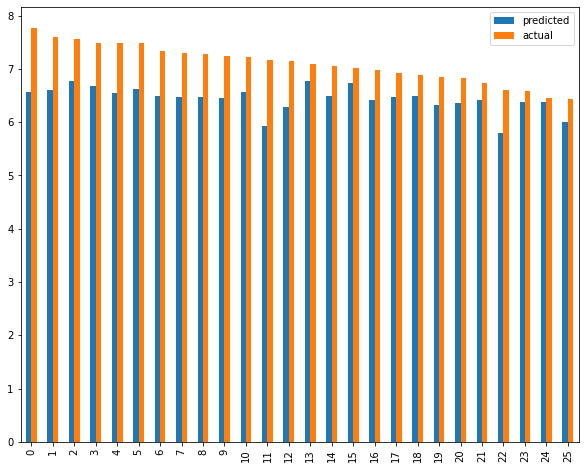

In [25]:
# let's plot the difference to get an idea of how close the predictions are
actual_vs_pred.loc[:25, :].plot(kind='bar',figsize=(10,8))
plt.show()

As we can observe, it looks like our model is making pretty decent predictions for the "Happiness Score". Now let's calculate the other evaluation metrics.

In [26]:
# calculate the other evaluation metrics  
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(actual.values, preds.values))  
print('Mean Squared Error:', metrics.mean_squared_error(actual.values, preds.values))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(actual.values, preds.values)))

Mean Absolute Error: 0.48963214998748994
Mean Squared Error: 0.3647634280796388
Root Mean Squared Error: 0.6039564786304049


We can see that most of the evaluation metrics are close to 0. For example, the root mean squared error (RMSE) indicates that the square root of the average squared difference between the true "Happiness score" and the predicted "Happiness Score" is about 0.6 units.

### Now you try extending the multiple linear regression model to all the numerical columns in the happiness dataset rather than just the first two.